# JURNAL MODUL III

### Melakukan Import Library


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Kode di atas merupakan bagian dari import library yang digunakan dalam program ini. Library numpy digunakan untuk komputasi numerik dan manipulasi array multidimensi. Library openCV digunakan untuk filter, transformasi, dan penggabungan gambar. Library matplotlib untuk membuat visualisasi data seperti grafik, plot, dan diagram.



### Menampilkan Citra Asli Dan Gray

Citra "IoriYagami.jpg" dibaca menggunakan fungsi plt.imread() dari library matplotlib yang akan menghasilkan representasi citra dalam bentuk array numpy. Setelah dibaca, citra tersebut diubah menjadi citra grayscale menggunakan fungsi cv.cvtColor. kwmmudian, ditampilkan menggunakan fungsi plt.imshow() yang juga berasal dari library Matplotlib.

(-0.5, 499.5, 779.5, -0.5)

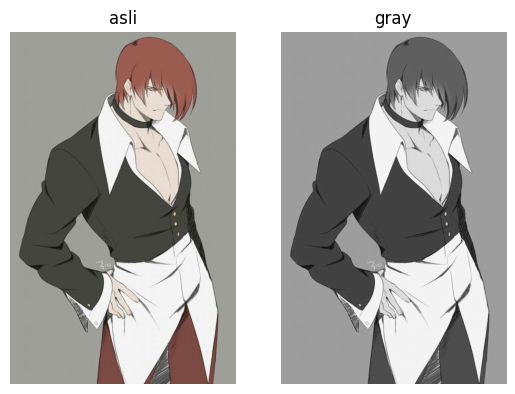

In [2]:
iori = plt.imread('IoriYagami.jpg')
ioriabu = cv.cvtColor(iori, cv.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.title('asli')
plt.imshow(iori)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('gray')
plt.imshow(ioriabu, cmap='gray')
plt.axis('off')

### Menyiapkan Fungsi Yang Akan Digunakan

In [3]:
def dekomposisi(abu, lowPassFilter, highPassFilter):
    if abu.shape[0] % 2 != 0:
        abu = abu[:-1, :]
    if abu.shape[1] % 2 != 0:
        abu = abu[:, :-1]

    newl = np.zeros((abu.shape[0], abu.shape[1]//2), dtype=float)
    newh = np.zeros((abu.shape[0], abu.shape[1]//2), dtype=float)
    newll = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newlh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newhl = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newhh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    
    for i in range(0, abu.shape[0], 1):
        for j in range(0, abu.shape[1], 2):
            newl[i, j//2] = (abu[i, j]*lowPassFilter[0]+abu[i, j+1]*lowPassFilter[1])/2
            newh[i, j//2] = (abu[i, j]*highPassFilter[0]+abu[i, j+1]*highPassFilter[1])/2

    for i in range(0, newl.shape[0], 2):
        for j in range(0, newl.shape[1], 1):
            newll[i//2, j] = (newl[i, j]*lowPassFilter[0]+newl[i+1, j]*lowPassFilter[1])/2
            newlh[i//2, j] = (newl[i, j]*highPassFilter[0]+newl[i+1, j]*highPassFilter[1])/2
            newhl[i//2, j] = (newh[i, j]*lowPassFilter[0]+newh[i+1, j]*lowPassFilter[1])/2
            newhh[i//2, j] = (newh[i, j]*highPassFilter[0]+newh[i+1, j]*highPassFilter[1])/2
    
    return newll, newlh, newhl, newhh

def normalisasi(img):
    imgNormalisasi = (img - np.min(img)) / (np.max(img) - np.min(img))
    return imgNormalisasi

def merge(newll, newlh, newhl, newhh):
    (height, width) = newll.shape[:2]
    result = np.zeros((height*2, width*2))
    for i in range(height):
        for j in range(width):
            result[i,j] = newll[i,j]
            result[i+height, j] = newhl[i, j]
            result[i, j+width] = newlh[i, j]
            result[i+height, j+width] = newhh[i, j]
    
    return result

kode diatas merupakan setiap fungsi yang akan kita gunakan untuk melakukan dekomposisi citra. fungsi yang akan kita gunakan adalah sebagai berikut:

Fungsi 'dekomposisi' melakukan proses pengkondisian untuk memastikan dimensi baris dan kolomnya genap. Setelah itu, gambar dibagi menjadi sub-blok dan konvolusi dilakukan dengan filter rendah dan tinggi, sehingga menghasilkan koefisien LL, LH, HL, dan HH.

Fungsi 'normalisasi' digunakan untuk menghasilkan gambar yang dinormalisasi dengan nilai piksel dalam rentang antara 0 dan 1 dengan mengambil gambar sebagai inputan. Kemudian, menghitungnya dengan mengurangkan nilai minimum piksel dari gambar dan membaginya dengan selisih nilai maksimum dan minimum piksel dalam gambar.

Fungsi 'merge' digunakan untuk menyusun matriks koefisien sub-band ke dalam gambar hasil, dimana setiap koefisien sub-band diposisikan sesuai dengan kuadran yang sesuai dalam gambar hasil.






### Mendefinisikan Low Pass Filter dan High Pass Filter

In [4]:
lowPassFilter = np.array([0.7, 0.7])
highPassFilter = np.array([-0.7, 0.7])

Baris kode di atas merupakan inisialisasi filter rendah dengan koefisien [0.7, 0.7] dan filter tinggi dengan koefisien [-0.7, 0.7]. Nilai ini digunakan dalam transformasi wavelet untuk mengekstraksi frekuensi rendah dan tinggi dari sinyal.



### Melakukan Proses Dekomposisi dan Menampilkan Citra Hasil Dekomposisi Setelah Normalisasi

pertama-tama untuk melakukan transformasi wavelet terhadap gambar grayscale menggunakan filter rendah dan filter tinggi. Proses ini menghasilkan empat bagian yaitu 'LL', 'LH', 'HL', dan 'HH'. Setelah itu, setiap bagian dinormalisasi menggunakan fungsi 'normalisasi'. lalu, 'gabung' merupakan hasil dari proses fungsi 'merge'. Setelah itu, menampilkan visualisasi hasil transformasi wavelet dalam 5 subplot yang berbeda. Subplot pertama menampilkan bagian LL (Approximation), subplot kedua menampilkan bagian LH (Horizontal Details), subplot ketiga menampilkan bagian HL (Vertical Details), subplot keempat menampilkan bagian HH (Diagonal Details), dan subplot kelima menampilkan gabungan dari keempat bagian tersebut.



(-0.5, 499.5, 779.5, -0.5)

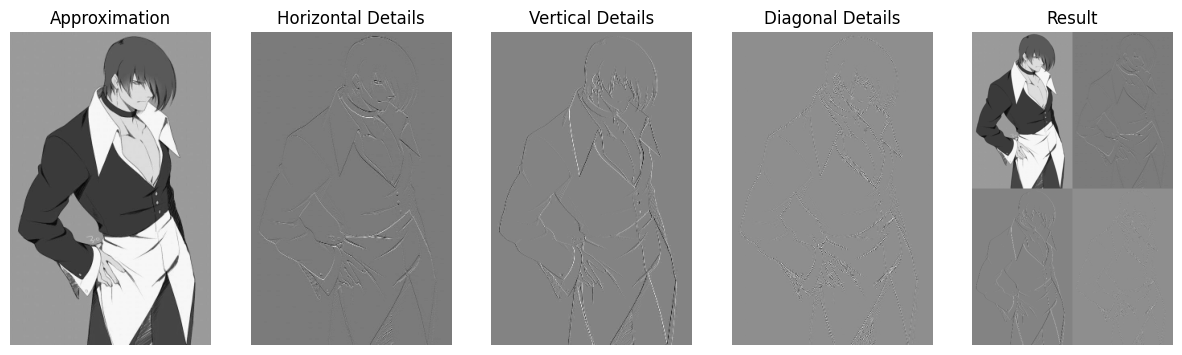

In [5]:
ll, lh, hl, hh = dekomposisi(ioriabu, lowPassFilter, highPassFilter)
LL = normalisasi(ll)
LH = normalisasi(lh)
HL = normalisasi(hl)
HH = normalisasi(hh)

gabung = merge(LL, LH, HL, HH)
plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.title('Approximation')
plt.imshow(LL, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.title('Horizontal Details')
plt.imshow(LH, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.title('Vertical Details')
plt.imshow(HL, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.title('Diagonal Details')
plt.imshow(HH, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.title('Result')
plt.imshow(gabung, cmap='gray')
plt.axis('off')

### Menyiapkan Fungsi Yang Akan Digunakan

In [6]:
def dilatasi(skala, img):
    height, width = img.shape
    Dilatasi = np.zeros((height*skala, width*skala))
    n = 0
    for i in range(height*skala):
        m = 0
        for j in range(width*skala):
            Dilatasi[i][j] = img[n][m]
            if j % skala == skala-1:
                m += 1
        if i % skala == skala-1:
            n += 1
    return Dilatasi

def merge_combined(lL, lH, hL, hH, levels):
    result = merge(lL, lH, hL, hH)
    for i in range(levels-1):
        lH = dilatasi(2, lH)
        hL = dilatasi(2, hL)
        hH = dilatasi(2, hH)
               
        if i >= 1:
            result = merge(result, lH, hL, hH)
        else:
            result = merge(result, lH, hL, hH)

    return result

kode diatas merupakan setiap fungsi yang akan kita gunakan untuk menampilkan hasil dekomposisi citra pada level 3, 4, 5 dan seterusnya secara dinamis . fungsi yang akan kita gunakan adalah sebagai berikut:

Fungsi 'dilatasi' digunakan untuk mengubah ukuran gambar menjadi lebih besar dari citra aslinya dengan memperbesar setiap piksel sesuai dengan faktor skala yang diberikan.

Fungsi 'merge_combined' digunakan untuk menggabungkan kembali bagian hasil transformasi wavelet setelah dilakukan operasi dilatasi pada beberapa level.




### Menampilkan Hasil Dekomposisi Citra Pada Level 3, 4, 5 Dan Seterusnya Secara Dinamis 

Code di bawah berfungsi untuk menampilkan hasil dekomposisi secara dinamis hingga berada pada level tertentu.

(-0.5, 7999.5, 12479.5, -0.5)

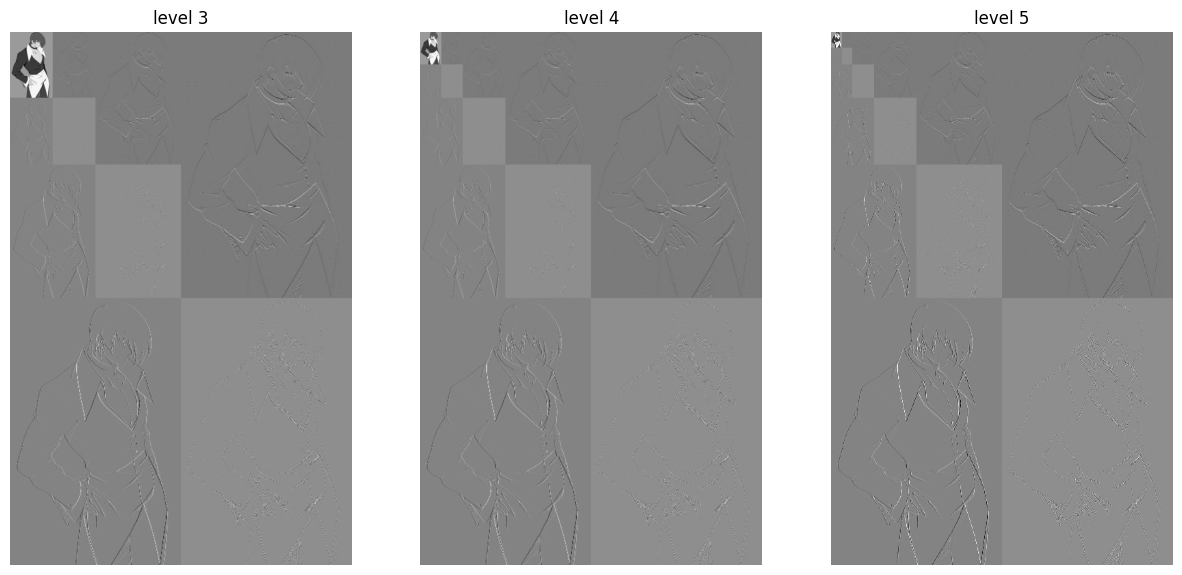

In [7]:
level3 = merge_combined(LL, LH, HL, HH, 3)
level4 = merge_combined(LL, LH, HL, HH, 4)
level5 = merge_combined(LL, LH, HL, HH, 5)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title('level 3')
plt.imshow(level3, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('level 4')
plt.imshow(level4, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('level 5')
plt.imshow(level5, cmap='gray')
plt.axis('off')


### Menyiapkan Fungsi Yang Akan Digunakan

In [8]:
def rekonstruksi(newll, newlh, newhl, newhh):
    height, width = newll.shape
    h = height*2
    w = width*2
    img = np.zeros([h, w])
    ll = dilatasi(2, newll)
    lh = dilatasi(2, newlh)
    hl = dilatasi(2, newhl)
    hh = dilatasi(2, newhh)
    for i in range(h):
        for j in range(w):
            img[i][j] += (ll[i][j]+lh[i][j]+hl[i][j]+hh[i][j])
    return img

Fungsi 'rekonstruksi' melakukan dilatasi pada masing-masing bagian. Setelah itu, citra asli direkonstruksi dengan menjumlahkan setiap piksel pada posisi yang sesuai dari keempat bagian tersebut.



### Melakukan Proses Rekonstruksi dan Menampilkan Citra Hasil Rekonstruksi


Dengan menggunakan fungsi 'rekonstruksi', gambar Iori Yagami direkonstruksi dari bagian-bagian hasil transformasi wavelet yang telah diambil sebelumnya. Hasil rekonstruksi tersebut kemudian ditampilkan menggunakan plt.imshow dalam skala warna abu-abu.



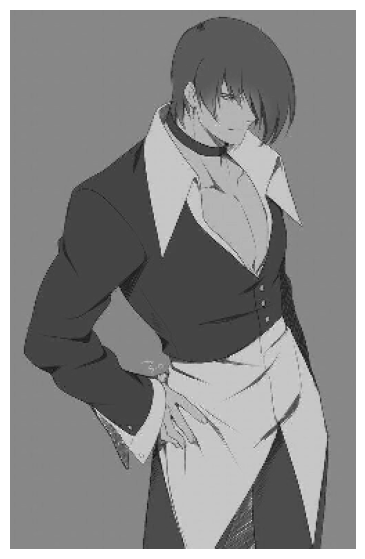

In [9]:
rekonstruksi_Iori = rekonstruksi(LL, LH, HL, HH)
fig = plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(rekonstruksi_Iori, cmap='gray')

### Melakukan Dekomposisi Hingga Terlihat Seperti Di Soal

'BaruLL', 'BaruLH', 'BaruHL', dan 'BaruHH' menyimpan level 1 masing-masing bagian dekomposisi citra. Setelah itu, dilakukan iterasi transformasi wavelet pada komponen LL (BaruLL) sebanyak lima kali. Pada setiap iterasi, dilakukan transformasi wavelet baru menggunakan filter rendah dan filter tinggi. Setelah iterasi selesai, hasil transformasi pada setiap level ditampilkan dalam empat subplot yang berbeda. Subplot pertama menampilkan komponen LL (Approximation), subplot kedua menampilkan komponen LH (Horizontal Details), subplot ketiga menampilkan komponen HL (Vertical Details), dan subplot keempat menampilkan komponen HH (Diagonal Details). Setiap subplot dilengkapi dengan judul yang sesuai dan menggunakan skala warna abu-abu.



(-0.5, 6.5, 11.5, -0.5)

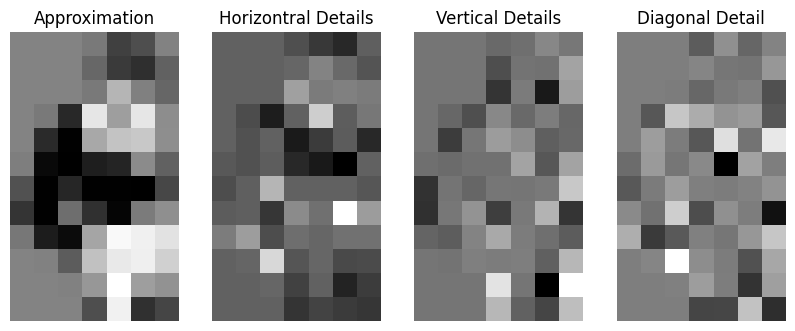

In [10]:
BaruLL, BaruLH, BaruHL, BaruHH = dekomposisi(ioriabu, lowPassFilter, highPassFilter)
BaruLL = normalisasi(BaruLL)
BaruLH = normalisasi(BaruLH)
BaruHL = normalisasi(BaruHL)
BaruHH = normalisasi(BaruHH)

for i in range(5):
    BaruLL, BaruLH, BaruHL, BaruHH = dekomposisi(BaruLL, lowPassFilter, highPassFilter)
    
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 4, 1)
plt.imshow(BaruLL, cmap='gray')
plt.title("Approximation")
plt.axis('off')
fig.add_subplot(1, 4, 2)
plt.imshow(BaruLH, cmap='gray')
plt.title("Horizontral Details")
plt.axis('off')
fig.add_subplot(1, 4, 3)
plt.imshow(BaruHL, cmap='gray')
plt.title("Vertical Details")
plt.axis('off')
fig.add_subplot(1, 4, 4)
plt.imshow(BaruHH, cmap='gray')
plt.title("Diagonal Detail")
plt.axis('off')

### Menyiapkan Fungsi Yang Akan Digunakan

In [11]:
def lineSignal(image):
    line = np.zeros((image.shape[0]*image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            line[i*image.shape[1]+j] = image[i][j]

    return line

Code di atas membuat method 'lineSignal' yang berfungsi untuk mengambil gambar sebagai input dan mengembalikan representasi linier dari gambar tersebut. Tahapan proses yang terjadi di fungsi ini yaitu Inisialisasi Array Linear, Mengubah Gambar menjadi Linier, dan Mengembalikan Representasi Linier. Fungsi ini juga berguna untuk mengubah gambar 2D menjadi representasi linier 1D.



### Menampilkan representasi sinyal pada hasil dekomposisi pada nomor 3


Code di bawah berfungsi untuk mengambil yang diperoleh dari dekomposisi wavelet level 5 (BaruLL, BaruLH, BaruHL, BaruHH) dan memvisualisasikannya sebagai sinyal linier. Masing-masing BaruLL, BaruLH, BaruHL, BaruHH diambil dengan slicing ([:12, :7]) untuk menyesuaikan dengan contoh (hanya menampilkan sebagian kecil subband). Kemudian terdapat Fungsi plt.plot yang digunakan untuk memplot sinyal linier yang disimpan dalam HHsignal, HLsignal, LHsignal, dan LLsignal.



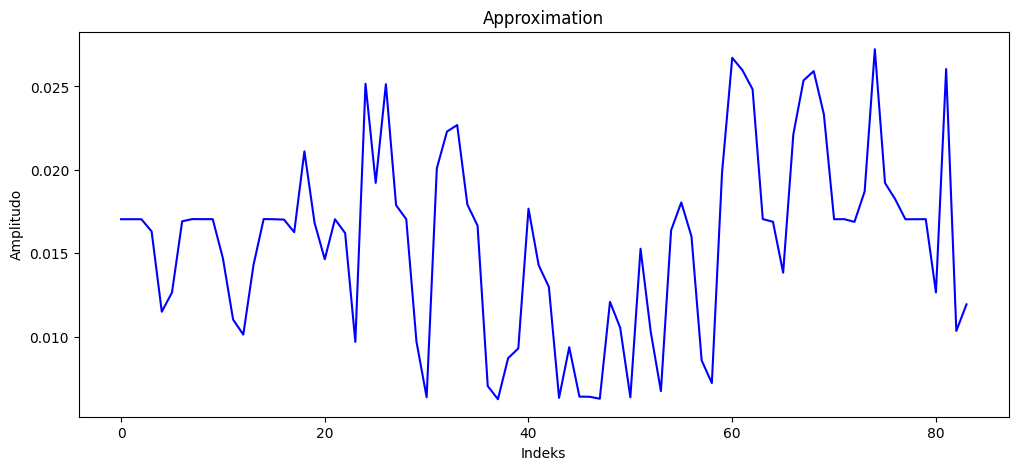

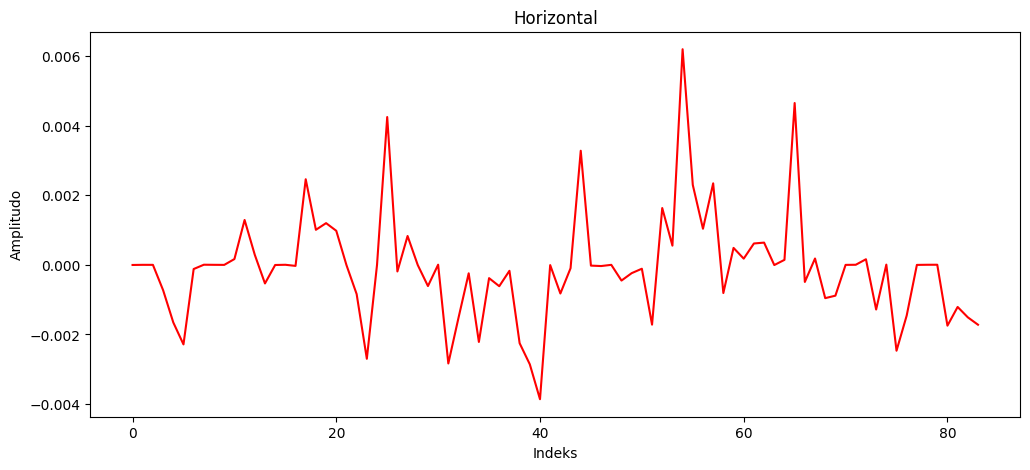

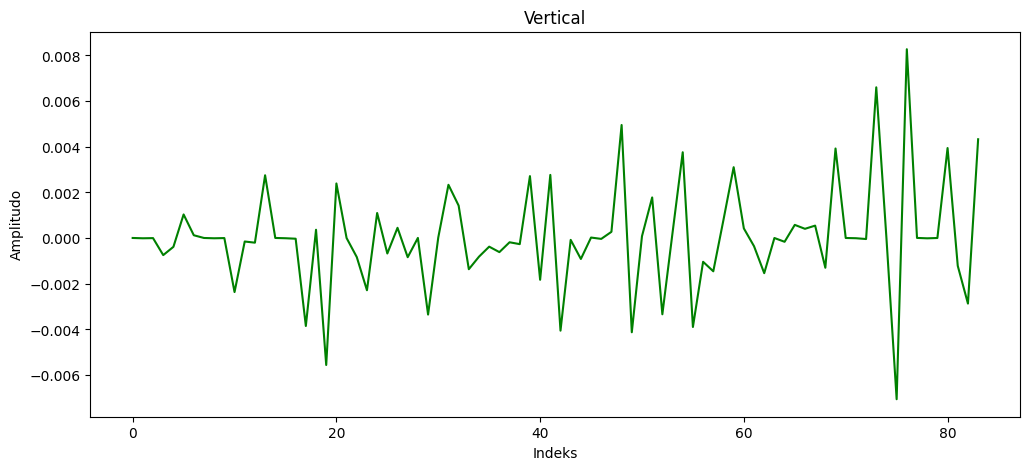

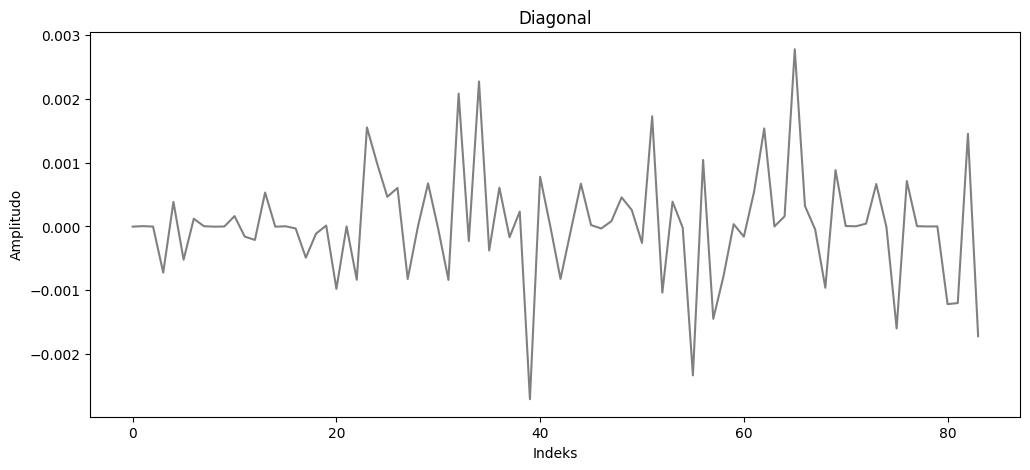

In [12]:
HHsignal = lineSignal(BaruHH[:12, :7])
HLsignal = lineSignal(BaruHL[:12, :7])
LHsignal = lineSignal(BaruLH[:12, :7])
LLsignal = lineSignal(BaruLL[:12, :7])

plt.figure(figsize=(12,5))
plt.plot(LLsignal, color='blue')
plt.title('Approximation')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(LHsignal, color='red')
plt.title('Horizontal')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(HLsignal, color='green')
plt.title('Vertical')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(HHsignal, color='gray')
plt.title('Diagonal')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()